In [1]:
import os
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.utils.fixes import loguniform
from sklearn.dummy import DummyClassifier

In [3]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [4]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris['data'], iris['target'])
scores.mean()

0.9733333333333334

In [5]:
res = cross_validate(logreg, iris['data'], iris['target'], return_train_score=True)
res

{'fit_time': array([0.0160141 , 0.02001858, 0.01401258, 0.01601386, 0.01501346]),
 'score_time': array([0.        , 0.        , 0.00100183, 0.        , 0.00100112]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [6]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.016014,0.000000,0.966667,0.966667
1,0.020019,0.000000,1.000000,0.966667
2,0.014013,0.001002,0.933333,0.983333
3,0.016014,0.000000,0.966667,0.983333
4,0.015013,0.001001,1.000000,0.975000


In [7]:
cross_val_predict(logreg, iris['data'], iris['target'], cv=5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

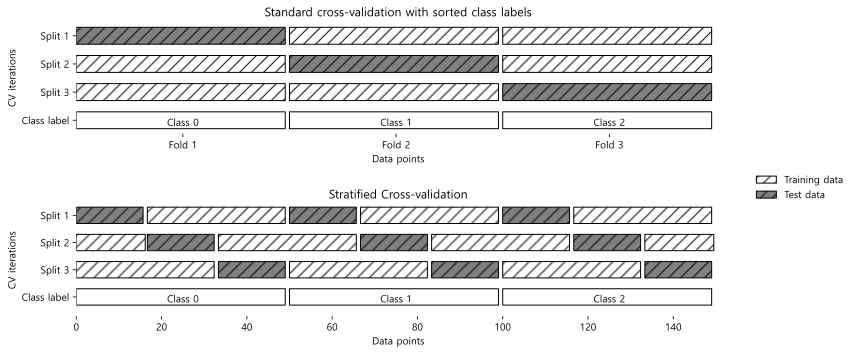

In [8]:
mglearn.plots.plot_stratified_cross_validation()

In [9]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris['data'], iris['target'], cv=kfold)

array([0.98, 0.96, 0.96])

In [10]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=loo)
scores.mean()

0.9666666666666667

In [11]:
shuffle_split = ShuffleSplit(train_size=0.5, test_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=shuffle_split)
scores.mean()

0.9586666666666666

In [12]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
scores

array([0.75      , 0.6       , 0.66666667])

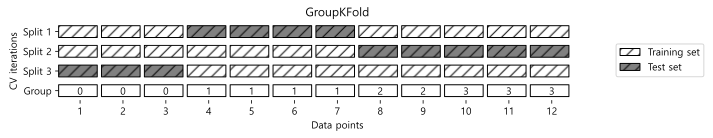

In [13]:
mglearn.plots.plot_group_kfold()

In [14]:
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=rskfold)
scores, scores.mean()

(array([1.        , 0.96666667, 0.93333333, 1.        , 0.93333333,
        0.96666667, 0.96666667, 0.93333333, 1.        , 0.96666667,
        0.93333333, 1.        , 1.        , 0.96666667, 0.96666667,
        0.9       , 1.        , 1.        , 0.93333333, 0.96666667,
        0.93333333, 0.96666667, 0.96666667, 1.        , 0.96666667,
        1.        , 0.96666667, 0.96666667, 0.9       , 1.        ,
        0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
        0.96666667, 0.96666667, 1.        , 1.        , 0.9       ,
        0.96666667, 1.        , 0.9       , 0.96666667, 0.96666667,
        0.9       , 0.96666667, 0.96666667, 1.        , 0.96666667]),
 0.9646666666666667)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
best_score = 0
kind = [0.001, 0.01, 0.1, 1, 10, 100]
for gamma in kind:
    for c in kind:
        svm = SVC(gamma=gamma, C=c).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C':c, 'gamma':gamma}
best_score, best_parameters

(0.9736842105263158, {'C': 100, 'gamma': 0.001})

In [16]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
X_train.shape, X_valid.shape, X_test.shape

((84, 4), (28, 4), (38, 4))

In [17]:
best_score = 0
kind = [0.001, 0.01, 0.1, 1, 10, 100]
for gamma in kind:
    for c in kind:
        svm = SVC(gamma=gamma, C=c).fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C':c, 'gamma':gamma}
best_score, best_parameters

(0.9642857142857143, {'C': 10, 'gamma': 0.001})

In [18]:
svm = SVC(**best_parameters).fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
test_score

0.9210526315789473

In [19]:
best_score = 0
kind = [0.001, 0.01, 0.1, 1, 10, 100]
for gamma in kind:
    for c in kind:
        svm = SVC(gamma=gamma, C=c)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C':c, 'gamma':gamma}
svm = SVC(**best_parameters).fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
test_score

0.9736842105263158

In [20]:
best_parameters

{'C': 10, 'gamma': 0.1}

In [21]:
param_grid = {'C':kind, 'gamma':kind}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

0.9736842105263158

In [23]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [24]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [25]:
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_).T
results

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.0004,0.001001,0.000801,0.001001,0.001001,0.000801,0.0004,0.001001,0.0006,0.000801,0.001001,0.001001,0.0002,0.000601,0.001001,0.000801,0.0002,0.001201,0.0002,0.0006,0.0004,0.0004,0.0004,0.001201,0.0004,0.000601,0.0006,0.0006,0.001001,0.001001,0.000601,0.0,0.000801,0.000601,0.001001,0.000801
std_fit_time,0.00049,0.0,0.0004,0.0,0.0,0.000401,0.00049,0.0,0.00049,0.0004,0.0,0.0,0.0004,0.00049,0.0,0.0004,0.000401,0.0004,0.0004,0.00049,0.00049,0.00049,0.00049,0.000401,0.00049,0.00049,0.00049,0.00049,0.0,0.0,0.00049,0.0,0.0004,0.00049,0.0,0.0004
mean_score_time,0.000601,0.0,0.0004,0.0002,0.0,0.0002,0.000601,0.0002,0.000601,0.0002,0.0002,0.0004,0.000801,0.0004,0.0,0.0002,0.000801,0.0002,0.000801,0.0002,0.0004,0.0002,0.000601,0.0006,0.0004,0.0002,0.0,0.0002,0.0,0.0004,0.0,0.000601,0.0002,0.0,0.0002,0.0004
std_score_time,0.00049,0.0,0.00049,0.000401,0.0,0.000401,0.00049,0.0004,0.00049,0.0004,0.000401,0.00049,0.0004,0.00049,0.0,0.0004,0.0004,0.0004,0.0004,0.0004,0.00049,0.0004,0.00049,0.00049,0.00049,0.0004,0.0,0.000401,0.0,0.00049,0.0,0.00049,0.0004,0.0,0.0004,0.00049
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}","{'C': 0.01, 'gamma': 10}","{'C': 0.01, 'gamma': 100}","{'C': 0.1, 'gamma': 0.001}","{'C': 0.1, 'gamma': 0.01}","{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1}","{'C': 0.1, 'gamma': 10}","{'C': 0.1, 'gamma': 100}","{'C': 1, 'gamma': 0.001}","{'C': 1, 'gamma': 0.01}","{'C': 1, 'gamma': 0.1}","{'C': 1, 'gamma': 1}","{'C': 1, 'gamma': 10}","{'C': 1, 'gamma': 100}","{'C': 10, 'gamma': 0.001}","{'C': 10, 'gamma': 0.01}","{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,1.0,0.347826,0.347826,0.695652,0.913043,1.0,0.956522,0.913043,0.391304,0.913043,1.0,1.0,0.956522,0.869565,0.521739,1.0,1.0,1.0,0.956522,0.869565,0.521739
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.695652,0.913043,0.913043,0.347826,0.347826,0.695652,0.913043,0.956522,0.913043,0.956522,0.434783,0.913043,0.956522,0.956522,0.956522,0.913043,0.521739,0.956522,0.913043,0.956522,0.956522,0.913043,0.521739
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.681818,0.909091,1.0,0.363636,0.363636,0.681818,1.0,1.0,1.0,1.0,0.545455,1.0,1.0,1.0,1.0,1.0,0.590909,1.0,1.0,1.0,1.0,1.0,0.590909


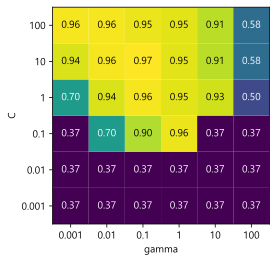

In [26]:
scores = np.array(results.T['mean_test_score']).astype('float64').reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=kind, yticklabels=kind, cmap='viridis')

In [27]:
param_grid = [{'kernel':['rbf'], 'C':kind, 'gamma':kind}, {'kernel':['linear'], 'C':kind}]
param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [28]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9731225296442687)

In [29]:
df = pd.DataFrame(grid_search.cv_results_)
(df
 .iloc[df['mean_test_score'].idxmax(), :]
)

mean_fit_time                                         0.000601
std_fit_time                                           0.00049
mean_score_time                                            0.0
std_score_time                                             0.0
param_C                                                     10
param_gamma                                                0.1
param_kernel                                               rbf
params                {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
split0_test_score                                          1.0
split1_test_score                                     0.956522
split2_test_score                                          1.0
split3_test_score                                     0.954545
split4_test_score                                     0.954545
mean_test_score                                       0.973123
std_test_score                                        0.021957
rank_test_score                                        

In [30]:
param_grid = {'C':kind, 'gamma':kind}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True), iris['data'], iris['target'], cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [31]:
param_dist = [{'kernel':['rbf'], 'C':loguniform(0.001, 100), 'gamma':loguniform(0.001, 100)}, {'kernel':['linear'], 'C':loguniform(0.001, 100)}]
param_dist

[{'kernel': ['rbf'],
  'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x245b128cfd0>,
  'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x245b03f7700>},
 {'kernel': ['linear'],
  'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x245b123d610>}]

In [32]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20, random_state=42, n_jobs=-1, cv=5, return_train_score=True)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000245B128CFD0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000245B03F7700>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000245B123D610>,
                                         'kernel': ['linear']}],
                   random_state=42, return_train_score=True)

In [33]:
rand_search.best_params_

{'C': 1.7965626423790642, 'kernel': 'linear'}

In [34]:
df = pd.DataFrame(rand_search.cv_results_)
(df
 .loc[df['mean_test_score'].nlargest(5).index]
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.000801,0.000400,0.000600,0.000490,1.796563,NaN,linear,"{'C': 1.7965626423790642, 'kernel': 'linear'}",1.0,0.956522,1.0,0.954545,0.954545,0.973123,0.021957,1,0.988764,1.000000,0.977778,0.988889,0.988889,0.988864,0.007027
8,0.000600,0.000490,0.000400,0.000490,1.143578,NaN,linear,"{'C': 1.14357802784334, 'kernel': 'linear'}",1.0,0.956522,1.0,0.954545,0.954545,0.973123,0.021957,1,0.988764,0.977528,0.977778,0.988889,1.000000,0.986592,0.008362
0,0.001401,0.000491,0.000400,0.000490,9.609813,0.008264,rbf,"{'C': 9.609812947036398, 'gamma': 0.0082636887...",1.0,0.956522,1.0,0.909091,0.954545,0.964032,0.033918,3,0.966292,0.966292,0.966667,0.977778,0.977778,0.970961,0.005567
1,0.000801,0.000400,0.000201,0.000401,0.984674,NaN,linear,"{'C': 0.9846738873614564, 'kernel': 'linear'}",1.0,0.956522,1.0,0.909091,0.954545,0.964032,0.033918,3,0.988764,0.977528,0.977778,0.988889,0.988889,0.984370,0.005485
19,0.000200,0.000400,0.000801,0.000400,0.158768,NaN,linear,"{'C': 0.1587678152692399, 'kernel': 'linear'}",1.0,0.956522,1.0,0.909091,0.954545,0.964032,0.033918,3,0.966292,0.966292,0.966667,0.977778,0.977778,0.970961,0.005567


In [35]:
digits = load_digits()
y = digits['target'] == 9
X_train, X_test, y_train, y_test = train_test_split(digits['data'], y, random_state=0)

In [36]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
dummy_majority.score(X_test, y_test)

0.8955555555555555

In [37]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

In [38]:
confusion = confusion_matrix(y_test, pred_logreg)
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

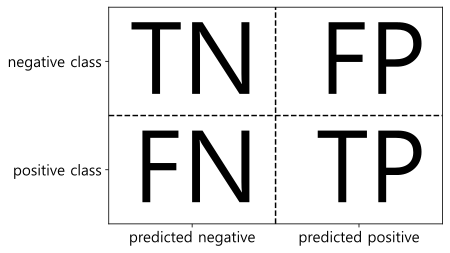

In [39]:
mglearn.plots.plot_binary_confusion_matrix()

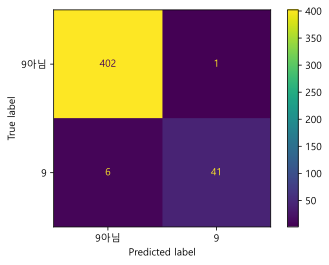

In [40]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['9아님', '9'])

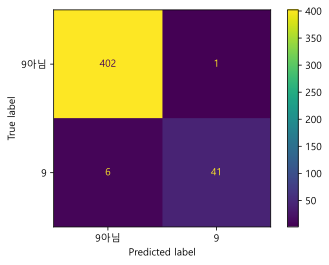

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=['9아님', '9'])

In [42]:
f1_score(y_test, pred_logreg)

0.9213483146067415

In [43]:
print(classification_report(y_test, pred_logreg, target_names=['9아님', '9']))

              precision    recall  f1-score   support

         9아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [44]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [46]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [47]:
svc.decision_function(X_test)

array([-0.99973208, -1.00148617, -1.1386043 , -0.98505482, -1.01044247,
       -1.00027441, -1.00609413,  0.88395198, -1.00467053, -1.00283866,
       -1.00097712,  1.07030762, -1.02076344, -0.40435353, -0.48739733,
       -1.00121046, -1.09560781, -1.44572917, -0.99908802, -1.00070245,
       -0.44364565, -1.01170286, -0.99918954, -1.0861769 , -1.33291363,
       -1.00320657, -0.99076097, -1.09564958,  0.63212214, -0.99238394,
       -1.47090403,  0.19153373,  0.74430046, -1.0084656 , -1.15104651,
       -1.02852903, -1.00840776, -1.23180696, -1.0031964 , -1.00023926,
       -1.0013854 , -1.00003771, -1.10114776, -0.98779744, -1.05818617,
       -1.00105363,  0.5230006 ,  0.97789353, -0.99559099,  0.52008479,
       -1.25711078, -1.08267667, -0.99828696, -1.00385465,  0.08620484,
       -0.99871026, -1.06221884, -1.02415268, -1.08797969, -1.06010122,
        0.36988055, -1.05630237, -0.99981001, -0.24173165, -1.02857919,
       -1.00058106, -0.99968788, -1.00115386, -0.99882791,  1.25

In [49]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

In [51]:
close_zero = np.argmin(np.abs(thresholds))

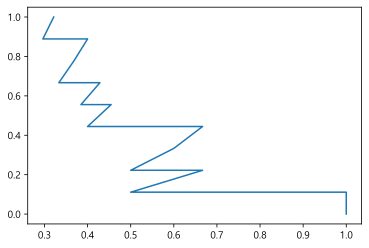

In [56]:
plt.plot(precision, recall, label='정밀도-재현율 곡선')

In [57]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))

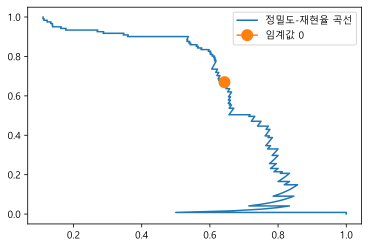

In [64]:
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.plot(precision[close_zero], recall[close_zero], marker='o', markersize=10, fillstyle=None, mew=2, label='임계값 0')
plt.legend()

In [66]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2).fit(X_train, y_train)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

In [74]:
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

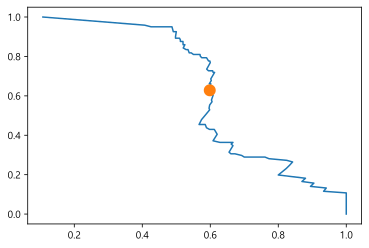

In [76]:
plt.plot(precision_rf, recall_rf, label='정밀도-재현율 곡선')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], marker='o', markersize=10, fillstyle=None, mew=2, label='rf임계값 0.5')

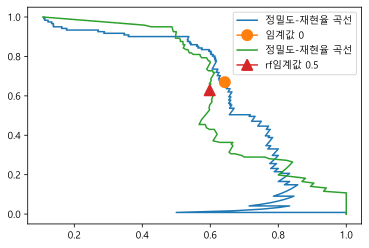

In [77]:
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.plot(precision[close_zero], recall[close_zero], marker='o', markersize=10, fillstyle=None, mew=2, label='임계값 0')
plt.plot(precision_rf, recall_rf, label='정밀도-재현율 곡선')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], marker='^', markersize=10, fillstyle=None, mew=2, label='rf임계값 0.5')
plt.legend()

In [79]:
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc, ap_rf

(0.6663140319391998, 0.659559370099291)

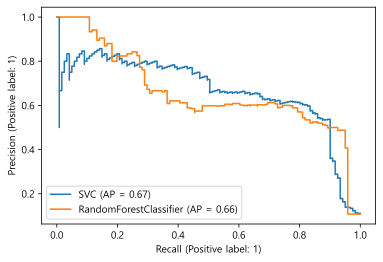

In [87]:
fig, ax = plt.subplots(1, 1)
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)

In [95]:
close_zero = np.argmin(np.abs(thresholds))

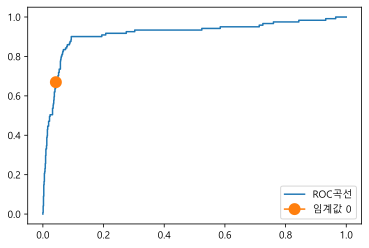

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC곡선')
plt.plot(fpr[close_zero], tpr[close_zero], marker='o', markersize=10, fillstyle=None, mew=2, label='임계값 0')
plt.legend()

In [99]:
auc_svc = roc_auc_score(y_test, svc.decision_function(X_test))
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
auc_svc, auc_rf

(0.9162935036712654, 0.9366953672911659)

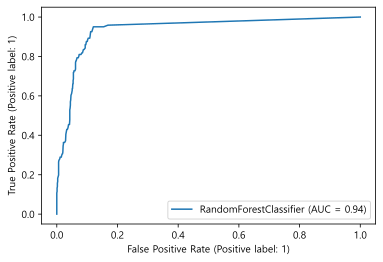

In [102]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

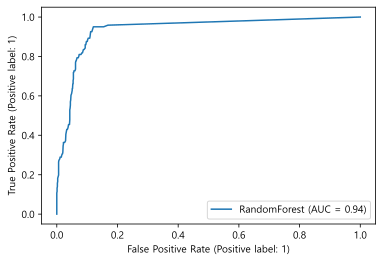

In [104]:
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:, 1], name='RandomForest')

In [105]:
y = digits['target'] == 9
X_train, X_test, y_train, y_test = train_test_split(digits['data'], y, random_state=0)

1.00, 0.90, 0.50
0.10, 0.90, 0.96
0.01, 0.90, 1.00


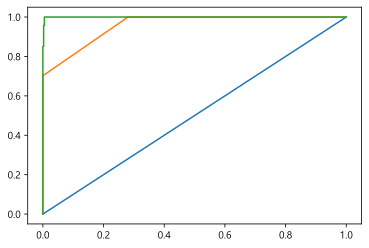

In [106]:
for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    print(f'{gamma:.2f}, {accuracy:.2f}, {auc:.2f}')
    plt.plot(fpr, tpr, label=f'{gamma:.2f}')

In [109]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
score = lr.score(X_test, y_test)
score, accuracy_score(y_test, pred)

(0.9533333333333334, 0.9533333333333334)

In [110]:
confusion_matrix(y_test, pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  1,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 44]], dtype=int64)

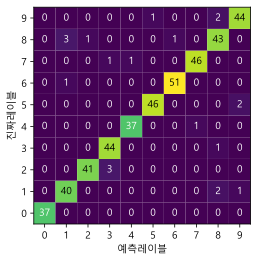

In [113]:
mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='예측레이블', ylabel='진짜레이블', 
                      xticklabels=digits['target_names'], yticklabels=digits['target_names'], fmt='%d')

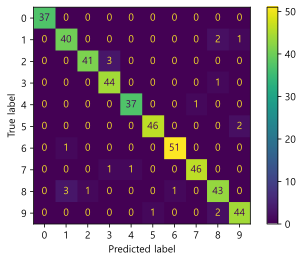

In [119]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

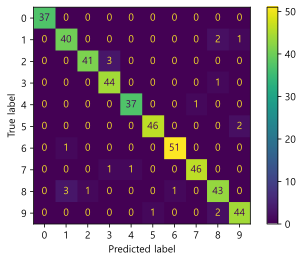

In [120]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [121]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [123]:
f1_score(y_test, pred, average='macro'), f1_score(y_test, pred, average='weighted'), f1_score(y_test, pred, average='micro')

(0.9542564253775861, 0.9534284099357165, 0.9533333333333334)

In [125]:
cross_val_score(SVC(), digits['data'], digits['target'] == 9, cv=5)

array([0.975     , 0.99166667, 1.        , 0.99442897, 0.98050139])

In [128]:
cross_val_score(SVC(), digits['data'], digits['target'] == 9, cv=5, scoring='roc_auc')

array([0.99717078, 0.99854252, 1.        , 0.999828  , 0.98400413])

In [131]:
pd.DataFrame(cross_validate(SVC(), digits['data'], digits['target'] == 9, cv=5,
               scoring=['accuracy', 'average_precision', 'roc_auc'], return_train_score=True))

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_roc_auc,train_roc_auc
0,0.015012,0.015014,0.975000,0.994433,0.975624,0.994997,0.997171,0.998679
1,0.015013,0.014013,0.991667,0.995825,0.988632,0.996010,0.998543,0.999141
2,0.016014,0.014013,1.000000,0.995132,1.000000,0.995317,1.000000,0.998975
3,0.015014,0.014013,0.994429,0.995828,0.998538,0.995257,0.999828,0.998825
4,0.014013,0.014013,0.980501,0.996523,0.950155,0.999257,0.984004,0.999914


In [132]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'] == 9, random_state=0)

In [138]:
param_grid = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3, n_jobs=-1).fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [140]:
average_precision_score(y_test, grid.decision_function(X_test)), roc_auc_score(y_test, grid.decision_function(X_test))

(0.996851803805767, 0.9996304313394224)

In [143]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='average_precision', cv=3, n_jobs=-1).fit(X_train, y_train)
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [144]:
average_precision_score(y_test, grid.decision_function(X_test)), roc_auc_score(y_test, grid.decision_function(X_test))

(0.9945622415117393, 0.9993664537247241)